In [1]:
#import statements

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
#Set Up the Database

connection = sqlite3.connect('student_grades.db')

cursor = connection.cursor()

print("created succesfully.")

created succesfully.


In [5]:
#Create the Necessary Tables

cursor.execute('''
    CREATE TABLE IF NOT EXISTS students (
        student_id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name TEXT,
        last_name TEXT
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS grades (
        grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
        student_id INTEGER,
        subject TEXT,
        grade INTEGER,
        FOREIGN KEY (student_id) REFERENCES students (student_id)
    )
''')

print("created succesfully.")

created succesfully.


In [7]:
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]
print(students_data)

[('Alice', 'Johnson'), ('Bob', 'Smith'), ('Carol', 'White'), ('David', 'Brown'), ('Eve', 'Davis')]


In [9]:
#Insert Data into the Tables

cursor.executemany('''
    INSERT INTO students (first_name, last_name)
    VALUES (?, ?)
    ''', students_data)

grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 78),
    (3, 'English', 83),
    (3, 'History', 87),
    (4, 'Math', 92),
    (4, 'English', 80),
    (4, 'History', 89),
    (5, 'Math', 88),
    (5, 'English', 91),
    (5, 'History', 85)
]

cursor.executemany('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (?, ?, ?)
    ''', grades_data)

In [11]:
# Perform SQL Queries

#Retrieve all students' names and their grades

cursor.execute('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id;
    ''')

results = cursor.fetchall()

for row in results:
    print(row)

('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 78)
('Carol', 'White', 'English', 83)
('Carol', 'White', 'History', 87)
('David', 'Brown', 'Math', 92)
('David', 'Brown', 'English', 80)
('David', 'Brown', 'History', 89)
('Eve', 'Davis', 'Math', 88)
('Eve', 'Davis', 'English', 91)
('Eve', 'Davis', 'History', 85)


In [13]:
#Find the average grade for each student

cursor.execute('''
    SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id;
    ''')

results = cursor.fetchall()

for row in results:
    print(row)

('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 82.66666666666667)
('David', 'Brown', 87.0)
('Eve', 'Davis', 88.0)


In [15]:
#Find the student with the highest average grade

cursor.execute('''
    SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
    ORDER BY average_grade DESC
    LIMIT 1;
    ''')

results = cursor.fetchall()

for row in results:
    print(row)

('Alice', 'Johnson', 91.0)


In [17]:
#Find the average grade for the Math subject

cursor.execute('''
    SELECT AVG(grade) AS average_math_grade
    FROM grades
    WHERE subject = 'Math';
    ''')

results = cursor.fetchall()

print(results)

[(87.0,)]


In [19]:
#List all students who scored above 90 in any subject

cursor.execute('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    WHERE grades.grade > 90;
    ''')

results = cursor.fetchall()

for row in results:
    print(row)

('Alice', 'Johnson', 'Math', 95)
('David', 'Brown', 'Math', 92)
('Eve', 'Davis', 'English', 91)


In [21]:
# Load Data into Pandas

combined_df = pd.read_sql_query('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
''', connection)

combined_df

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,82
4,Bob,Smith,English,76
5,Bob,Smith,History,85
6,Carol,White,Math,78
7,Carol,White,English,83
8,Carol,White,History,87
9,David,Brown,Math,92


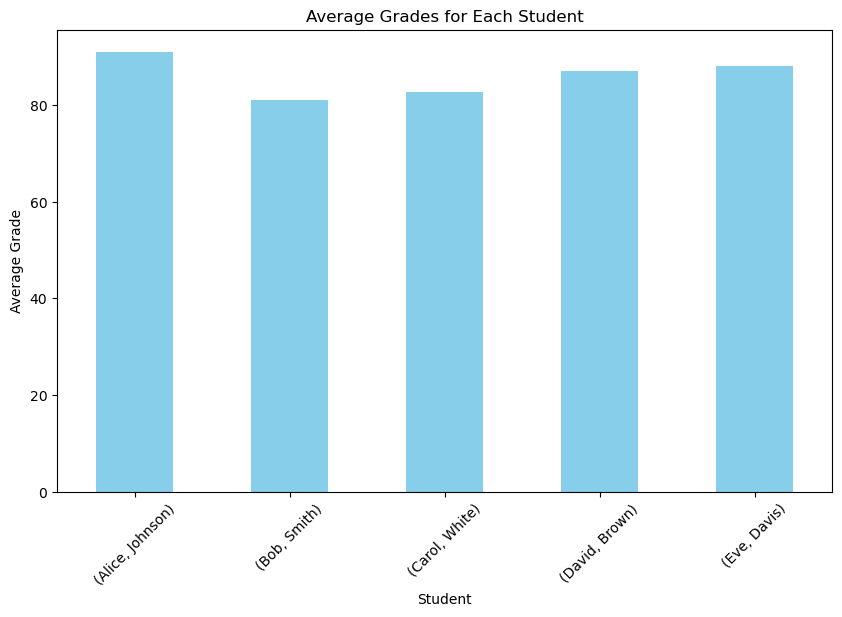

In [23]:
avg_grades_per_student = combined_df.groupby(['first_name', 'last_name'])['grade'].mean()

avg_grades_per_student.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Grades for Each Student')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.xticks(rotation=45)
plt.show()

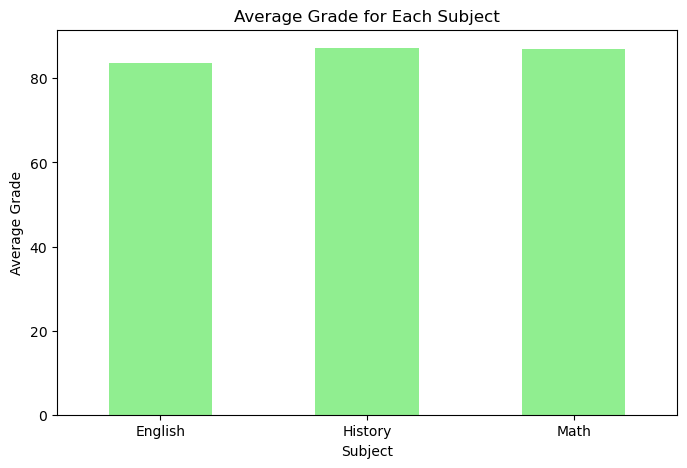

In [25]:
# Calculate the average grade for each subject
avg_grades_per_subject = combined_df.groupby('subject')['grade'].mean()

# Plot the average grade for each subject
avg_grades_per_subject.plot(kind='bar', figsize=(8, 5), color='lightgreen')
plt.title('Average Grade for Each Subject')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.xticks(rotation=0)
plt.show()


In [27]:
# Bonus task

cursor.execute('''
    SELECT s.first_name, s.last_name, g.subject, g.grade
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
    WHERE g.grade = (
    SELECT MAX(grade) 
    FROM grades g2 
    WHERE g2.subject = g.subject);
    ''')

results = cursor.fetchall()

for row in results:
    print(row)

('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'History', 90)
('Eve', 'Davis', 'English', 91)


In [29]:
query = '''
SELECT s.first_name, s.last_name, g.subject, g.grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
WHERE g.grade = (
    SELECT MAX(grade) 
    FROM grades g2 
    WHERE g2.subject = g.subject
);
'''

highest_grades_df = pd.read_sql_query(query, connection)

print(highest_grades_df)

  first_name last_name  subject  grade
0      Alice   Johnson     Math     95
1      Alice   Johnson  History     90
2        Eve     Davis  English     91


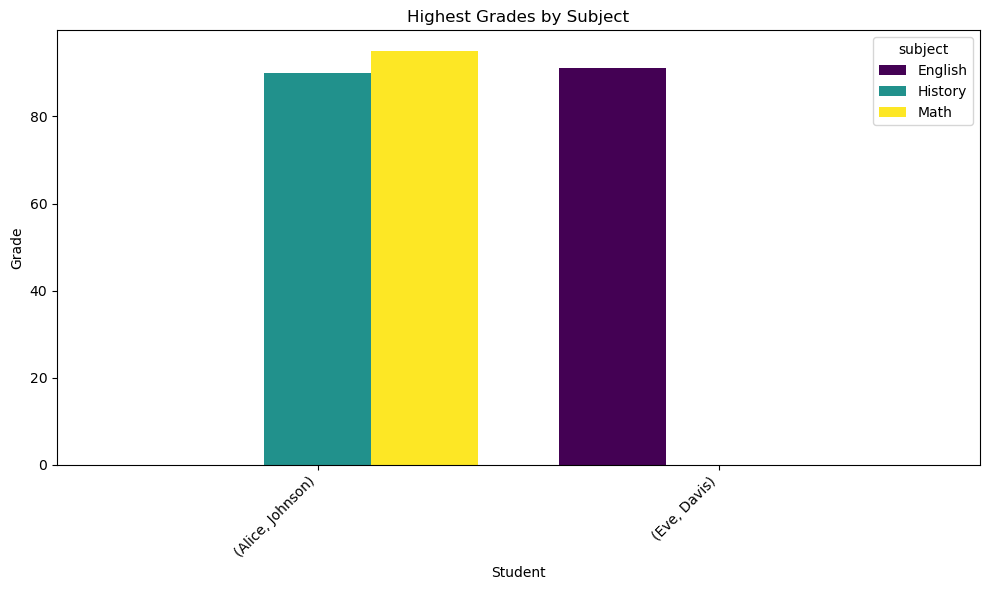

In [31]:
pivot_df = highest_grades_df.pivot(index=['first_name', 'last_name'], columns='subject', values='grade')

pivot_df.plot(kind='bar', figsize=(10, 6), colormap='viridis', width=0.8)

plt.title('Highest Grades by Subject')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()